### プレゼンテーション - 3D CNN Based Automatic Diagnosis of ADHD Using Functional and Structural MRI

  
論文: https://ieeexplore.ieee.org/document/8067637/all-figures

#### 1. 使用するデータセットと教師ラベル

fMRI - fALFF: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/*.nii.gz  
sMRI - GM: /Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/*.nii.gz  
教師ラベル: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200_Phenotypic.csv  
画像データの説明: /Users/yasu/school/presentation/datasets/ADHD200/ADHD200のデータについて.txt  
教師ラベルの説明: /Users/yasu/school/presentation/datasets/ADHD200/ADHD-200_PhenotypicKey.pdf  

#### 2. ライブラリのインポート

In [3]:
import numpy as np
import pandas as pd
import nibabel as nib
import glob
from nilearn import plotting, image
from matplotlib import pyplot as plt
%matplotlib inline

#### 4. 機能的MRI - fMRI_fALFFのインポート

In [4]:
#C 画像データファイルのインポート

input_fMRI_fALFF = glob.glob("/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/*.nii.gz")
input_fMRI_fALFF

['/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_KKI_3519022.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_NYU_0010048.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_Pittsburgh_0016078.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_NYU_0021024.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_NYU_0010035.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_Pittsburgh_0016005.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/results/fALFF_FunImgARCW/fALFFMap_ADHD200_Peking_3_2208591.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_RfMRI_1/resu

In [5]:
#C 画像データの次元の確認

img_fMRI_fALFF = nib.load(input_fMRI_fALFF[0])
img_fMRI_fALFF.shape

#C 次元の「縦、横、奥行」は全て「61 x 73 x 61」で統一されている様なので変換する必要性はないかも

(61, 73, 61)

1. plot_img
2. plot_stat_map
3. plot_anat
4. plot_roi
5. plot_epi


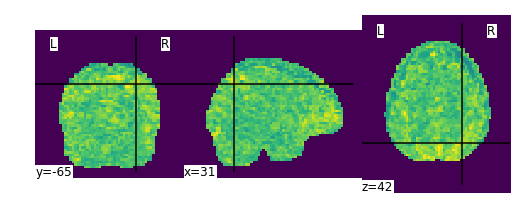

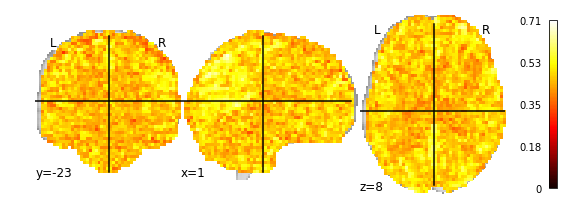

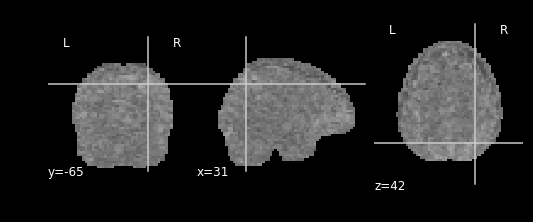

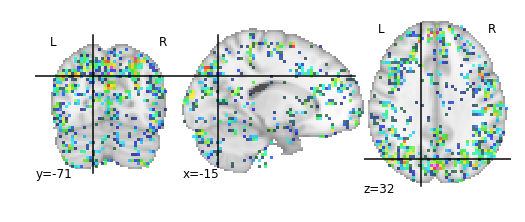

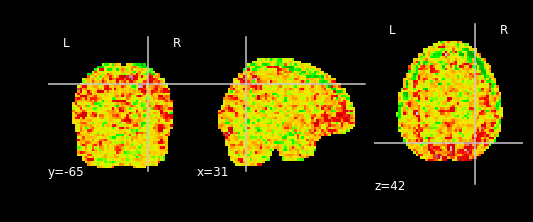

In [6]:
#C 画像データの画像の確認(プロット)

plotting.plot_img(img_fMRI_fALFF)
print("1. plot_img")
plotting.plot_stat_map(img_fMRI_fALFF)
print("2. plot_stat_map")
plotting.plot_anat(img_fMRI_fALFF)
print("3. plot_anat")
plotting.plot_roi(img_fMRI_fALFF)
print("4. plot_roi")
plotting.plot_epi(img_fMRI_fALFF)
print("5. plot_epi")

In [7]:
#C 画像データの結合1 - 一つずつ

test_mul = image.concat_imgs([input_fMRI_fALFF[0], input_fMRI_fALFF[1], input_fMRI_fALFF[2]])
test_mul.shape

#? 必要か不明だが、画像データとしてロードしたものを一つの変数に入れる必要があるのか分からない

(61, 73, 61, 3)

In [8]:
#C 4次元のため3次元に変換

single_mni_image = image.index_img(test_mul, 1)
single_mni_image.shape

(61, 73, 61)

In [10]:
#C 画像データの結合2 - forループ

l = 0
for i in enumerate(input_fMRI_fALFF):
    mul_imgs_fMRI_fALFF = image.concat_imgs(input_fMRI_fALFF[l])
    l += 1
    
mul_imgs_fMRI_fALFF.shape

#? 上手くいかない
#? 一画像データしかインポートできていない

(61, 73, 61, 1)

#### 5. 構造的MRI_GMのインポート

In [11]:
#C 画像データファイルのインポート

input_sMRI_GM = glob.glob("/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/*.nii.gz")
input_sMRI_GM

['/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Peking_2_1628610_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Pittsburgh_0016080_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Pittsburgh_0025002_c1mprage.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Peking_1_2342030_c1mprage.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Peking_1_1805037_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_NeuroIMAGE_1585708_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Pittsburgh_0016041_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_KKI_4601682_c1mprage_noface.nii.gz',
 '/Users/yasu/school/presentation/datasets/ADHD200/VBM_1/c1/ADHD200_Peking_1_7947495_c1mprage.nii.gz',
 '/Users/yasu/school/present

In [12]:
#C 画像データの次元の確認

img_sMRI_GM = nib.load(input_sMRI_GM[0])
img_sMRI_GM.shape

#C 次元の「縦、横、奥行」はマチマチなのでサイズを統一する必要がある。
#? 統一する下記方法から最適なものを選ぶ
#? - 画像の縮小、拡大
#? - 画像のセンタリング
#? - パディング
#? - 画像の切り取り

(176, 208, 256)

1. plot_img
2. plot_stat_map
3. plot_anat
4. plot_roi
5. plot_epi


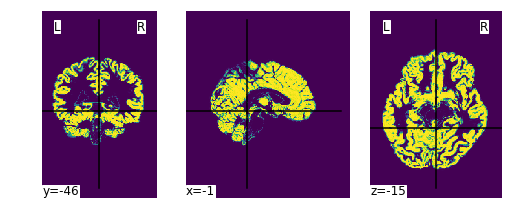

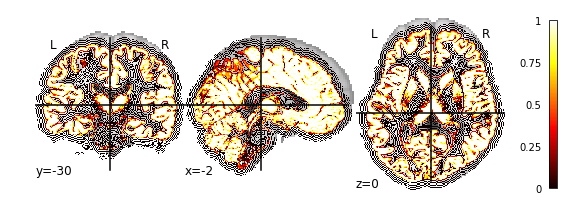

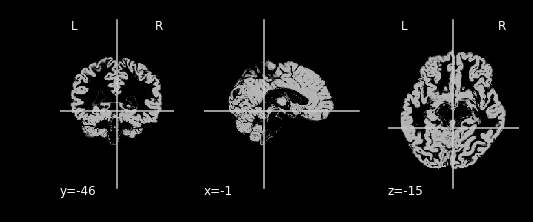

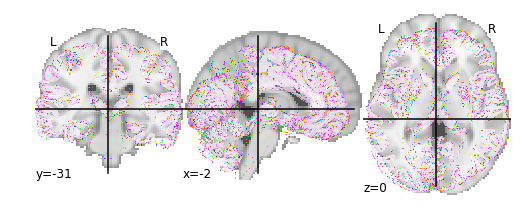

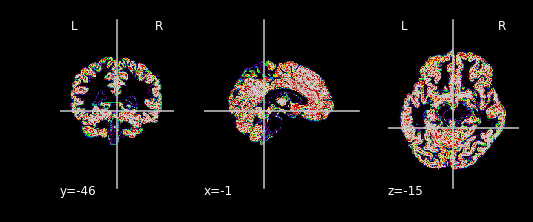

In [13]:
#C 画像データの画像の確認(プロット)

plotting.plot_img(img_sMRI_GM)
print("1. plot_img")
plotting.plot_stat_map(img_sMRI_GM)
print("2. plot_stat_map")
plotting.plot_anat(img_sMRI_GM)
print("3. plot_anat")
plotting.plot_roi(img_sMRI_GM)
print("4. plot_roi")
plotting.plot_epi(img_sMRI_GM)
print("5. plot_epi")

#### 6. 教師ラベルのインポート

In [14]:
#C 教師データファイルのインポート

label_input = pd.read_csv("/Users/yasu/school/presentation/datasets/ADHD200/ADHD200_Phenotypic.csv")
label_input.head(3)

,Participant ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,'ADHD200_Brown_0026001',2,1,16.92,1,'pending','pending','pending','pending','pending',...,104,'N/A',120,'pending',1,[],[],'N/A',1,'N/A'
1,'ADHD200_Brown_0026002',2,1,15.68,1,'pending','pending','pending','pending','pending',...,106,'N/A',107,'pending',1,[],[],'N/A',1,'N/A'
2,'ADHD200_Brown_0026004',2,0,14.99,1,'pending','pending','pending','pending','pending',...,123,'N/A',125,'pending',1,[],[],'N/A',1,'N/A'


#### 下記は参考用

In [ ]:
#C サイズ調整
#C ただしこれは3次元ではなくなってしまうため本来の目的から外れてしまうため使えない
# https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
BLUE = [255,255,255]
img1 = img_fMRI_fALFF
img1.shape

constant=cv2.copyMakeBorder(array_1d,30,30,40,40,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(array_1d,'gray'),plt.title('ORIGINAL')
plt.subplot(233),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()
print(constant.shape)

array_3d = np.array(img1.dataobj)
array_1d = np.reshape(array_3d, 271633)
array_1d.shape

a = tf.ones([3, 4, 3])
a.shape

tf.image.resize_image_with_crop_or_pad(a, 5, 5)